<a href="https://colab.research.google.com/github/mrinaligupta255/Practice-on-Keras-Library/blob/master/Time_Series_Prediction_With_multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential

plt.style.use(['dark_background'])

seed=1
url='https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/international-airline-passengers.csv'

Using TensorFlow backend.


[[112]
 [118]
 [132]
 [129]
 [121]
 [135]
 [148]
 [148]
 [136]
 [119]
 [104]
 [118]
 [115]
 [126]
 [141]
 [135]
 [125]
 [149]
 [170]
 [170]
 [158]
 [133]
 [114]
 [140]
 [145]
 [150]
 [178]
 [163]
 [172]
 [178]
 [199]
 [199]
 [184]
 [162]
 [146]
 [166]
 [171]
 [180]
 [193]
 [181]
 [183]
 [218]
 [230]
 [242]
 [209]
 [191]
 [172]
 [194]
 [196]
 [196]
 [236]
 [235]
 [229]
 [243]
 [264]
 [272]
 [237]
 [211]
 [180]
 [201]
 [204]
 [188]
 [235]
 [227]
 [234]
 [264]
 [302]
 [293]
 [259]
 [229]
 [203]
 [229]
 [242]
 [233]
 [267]
 [269]
 [270]
 [315]
 [364]
 [347]
 [312]
 [274]
 [237]
 [278]
 [284]
 [277]
 [317]
 [313]
 [318]
 [374]
 [413]
 [405]
 [355]
 [306]
 [271]
 [306]
 [315]
 [301]
 [356]
 [348]
 [355]
 [422]
 [465]
 [467]
 [404]
 [347]
 [305]
 [336]
 [340]
 [318]
 [362]
 [348]
 [363]
 [435]
 [491]
 [505]
 [404]
 [359]
 [310]
 [337]
 [360]
 [342]
 [406]
 [396]
 [420]
 [472]
 [548]
 [559]
 [463]
 [407]
 [362]
 [405]
 [417]
 [391]
 [419]
 [461]
 [472]
 [535]
 [622]
 [606]
 [508]
 [461]
 [390]

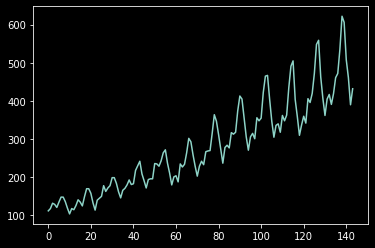

In [2]:
dataframe=pd.read_csv(url,sep=';',usecols=[1])
dataset=dataframe.values
print(dataset)
plt.plot(dataset)

In [0]:
train_size=int(len(dataset)*0.67)
test_size=len(dataset)-train_size
train=dataset[0:train_size,:]
test=dataset[train_size:len(dataset),:]

In [0]:
#to convert the problem into regression
#given the number of passenger for the last 'look_back months',fing the number of passenger in the next month
def create_dataset(dataset,look_back=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-look_back):
    dataX.append(dataset[i:i+look_back,0])
    dataY.append(dataset[i+look_back,0])

  return np.array(dataX),np.array(dataY)


In [5]:

look_back=1
x_train,y_train=create_dataset(train,look_back)
print(x_train.shape)
x_test,y_test=create_dataset(test,look_back)
model=Sequential()
model.add(Dense(8,input_dim=look_back,activation='relu',kernel_initializer='normal'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=200,batch_size=2,verbose=0)

(95, 1)


In [6]:
trainscore=model.evaluate(x_train,y_train,verbose=0)
print('Train score',trainscore,math.sqrt(trainscore))
testscore=model.evaluate(x_test,y_test,verbose=0)
print('Train score',testscore,math.sqrt(testscore))

Train score 537.8054346988075 23.190632477334624
Train score 2343.8201930269283 48.41301677262974


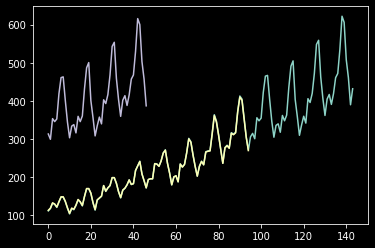

In [19]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
plt.plot(dataset)
plt.plot(train_predict)
plt.plot(test_predict)
plt.show()